In [2]:
import pandas as pd
df1 = pd.read_csv("princess_corpus.csv")
df = df1.copy()
df.head()

,Disney_Period,Text,Speaker_Status,Movie,Speaker,Year,UTTERANCE_NUMBER
0,EARLY,slave in the magic mirror come from the farthe...,NON-P,Snow White,queen,1937,1
1,EARLY,"what wouldst thou know, my queen ?",NON-P,Snow White,mirror,1937,2
2,EARLY,"magic mirror on the wall, who is the fairest o...",NON-P,Snow White,queen,1937,3
3,EARLY,"famed is thy beauty, majesty. but hold, a love...",NON-P,Snow White,mirror,1937,4
4,EARLY,alas for her ! reveal her name.,NON-P,Snow White,queen,1937,5


In [11]:
import nltk

In [3]:
from pymorphy2 import MorphAnalyzer
from nltk import wordpunct_tokenize
morph = MorphAnalyzer()

In [4]:
from nltk.corpus import stopwords
stops = set(stopwords.words('english'))

In [5]:
def lemmatize(x):
    if type(x) != str:
        return ""
    text = wordpunct_tokenize(x)
    result = []
    for word in text:
        if word.isalpha():
            nf = morph.parse(word)[0].normal_form
            if nf not in stops:
                result.append(nf)
    return " ".join(result)

In [6]:
from pymystem3 import Mystem
m = Mystem()

In [7]:
def parse(x):
    result = []
    ana = nltk.pos_tag(x.split())
    for tagged_token in ana:
        result.append(tagged_token[1])
    return ' '.join(result)

In [8]:
def length(x):
    return len(x)

In [9]:
df['Length'] = (df['Text']).apply(length)
df

,Disney_Period,Text,Speaker_Status,Movie,Speaker,Year,UTTERANCE_NUMBER,Length
0,EARLY,slave in the magic mirror come from the farthe...,NON-P,Snow White,queen,1937,1,125
1,EARLY,"what wouldst thou know, my queen ?",NON-P,Snow White,mirror,1937,2,35
2,EARLY,"magic mirror on the wall, who is the fairest o...",NON-P,Snow White,queen,1937,3,58
3,EARLY,"famed is thy beauty, majesty. but hold, a love...",NON-P,Snow White,mirror,1937,4,130
4,EARLY,alas for her ! reveal her name.,NON-P,Snow White,queen,1937,5,32
...,...,...,...,...,...,...,...,...
7743,LATE,we are never closing them again.,PRINCESS,Frozen,elsa,2013,984,33
7744,LATE,form on anna's boots.,PRINCESS,Frozen,elsa,2013,985,21
7745,LATE,"what? oh, elsa, they're beautiful, but you kno...",PRINCESS,Frozen,anna,2013,986,60
7746,LATE,look out. reindeer coming through!,NON-P,Frozen,kristoff,2013,987,35


In [12]:
df['Text'] = df['Text'].apply(lemmatize)
df['POS'] = df['Text'].apply(parse)
df

,Disney_Period,Text,Speaker_Status,Movie,Speaker,Year,UTTERANCE_NUMBER,Length,POS
0,EARLY,slave magic mirror come farthest space wind da...,NON-P,Snow White,queen,1937,1,125,VB JJ NN VB JJS NN NN NN JJ NN JJ NN VB JJ NN
1,EARLY,wouldst thou know queen,NON-P,Snow White,mirror,1937,2,35,NN NN VBP NN
2,EARLY,magic mirror wall fairest one,NON-P,Snow White,queen,1937,3,58,JJ NN NN VBP CD
3,EARLY,famed thy beauty majesty hold lovely maid see ...,NON-P,Snow White,mirror,1937,4,130,VBN JJ NN NN VBP RB VBN NN VBZ JJ RB JJ NN NNS...
4,EARLY,alas reveal name,NON-P,Snow White,queen,1937,5,32,NNS VBP NN
...,...,...,...,...,...,...,...,...,...
7743,LATE,never closing,PRINCESS,Frozen,elsa,2013,984,33,RB NN
7744,LATE,form anna boots,PRINCESS,Frozen,elsa,2013,985,21,NN NN NNS
7745,LATE,oh elsa beautiful know ska,PRINCESS,Frozen,anna,2013,986,60,UH JJ NN VBP NN
7746,LATE,look reindeer coming,NON-P,Frozen,kristoff,2013,987,35,NN NN VBG


In [45]:
speakers = df.groupby("Speaker").agg({"Text" : list, "POS" : list, "Length": "mean"}).reset_index()
speakers

,Speaker,Text,POS,Length
0,girls,[prince ali handsome ali ababwa question ali a...,[NN VBZ JJ NNS JJ NN IN VBG NN NN RB JJ RB VBG...,422.000000
1,ahch,[ahchooooo],[NN],12.000000
2,all,[human gonna],[JJ NN],36.000000
3,announcer,[ladies gentlemen royal highness prince naveen],[NNS NNS VBP JJ NN NN],57.000000
4,boat guest,[bam one killer diller costume hey gator blow ...,[NN CD NN NN NN NN NN NN NN],75.000000
...,...,...,...,...
419,wrestler,[wrestling match nobody bites like gaston],[VBG NN NN VBZ IN NN],47.000000
420,yao,"[woo hoo gonna hit hard make ancestors dizzy, ...","[NN NN NN VBD JJ NN NNS VBP, NN, NN, JJ NN JJ ...",31.695652
421,yow,"[hmmm, looking]","[NN, VBG]",17.000000
422,zazu,"[mother ever tell play food, announce king muf...","[NN RB VBP VB NN, NN VBG JJ NN, RB JJ NN VBG N...",59.444444


In [26]:
from collections import Counter


In [94]:
def frequency(x):
    words = []
    for el in x:
        words.extend(el.split())
    counter = dict(Counter(words))
    return counter


In [98]:
speakers["w_freq"] = speakers["Text"].apply(frequency)
speakers["pos_freq"] = speakers["POS"].apply(frequency)
elsa = speakers[speakers["Speaker"] == "elsa"].reset_index()


dict_keys(['sleeps', 'bed', 'little', 'sister', 'anna', 'pops', 'beside', 'go', 'back', 'sleep', 'play', 'watch', 'hi', 'olaf', 'like', 'warm', 'hugs', 'gotcha', 'slow', 'mama', 'papa', 'parents', 'burst', 'frozen', 'door', 'gasp', 'sight', 'room', 'accident', 'sorry', 'remember', 'powers', 'peeks', 'key', 'hole', 'away', 'feel', 'king', 'let', 'show', 'scared', 'getting', 'stronger', 'touch', 'want', 'hurt', 'see', 'good', 'girl', 'always', 'conceal', 'put', 'make', 'one', 'wrong', 'move', 'everyone', 'know', 'today', 'agony', 'wait', 'tell', 'guards', 'open', 'gate', 'look', 'beautiful', 'thank', 'party', 'looks', 'amazing', 'smell', 'dance', 'well', 'sprightly', 'okay', 'marriage', 'confused', 'brothers', 'staying', 'married', 'may', 'talk', 'please', 'alone', 'fine', 'marry', 'man', 'met', 'true', 'love', 'asked', 'blessing', 'answer', 'excuse', 'think', 'close', 'gates', 'give', 'glove', 'leave', 'enough', 'said', 'stay', 'snow', 'glows', 'white', 'mountain', 'tonight', 'footprint

Text(0.5, 1.0, 'Слова Эльзы по частотам')

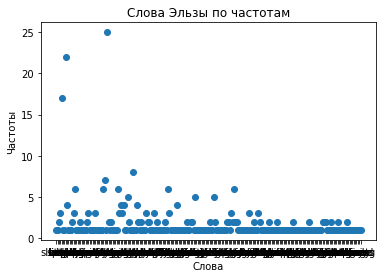

In [101]:
ys = elsa["w_freq"][0].values()
xs = elsa["w_freq"][0].keys()
plt.scatter(xs, ys)
plt.xlabel("Слова")
plt.ylabel("Частоты")
plt.title("Слова Эльзы по частотам")

In [77]:
beauty = speakers[speakers["Speaker"] == "belle"]
beauty


,Speaker,Text,POS,Length,w_freq,pos_freq
65,belle,[little town quiet village every day like one ...,[JJ NN JJ NN DT NN IN CD JJ NN JJ JJ NNS VBG V...,41.573333,"{'little': 6, 'town': 3, 'quiet': 1, 'village'...","{'JJ': 89, 'NN': 199, 'DT': 3, 'IN': 9, 'CD': ..."


In [52]:
for i in speakers["Speaker"]:
    print(i, spea)

    girls
 ahch 
 all
 announcer
 boat guest
 burford
 charlotte
 dingwall
 dr. facilier
 eudora
 goodbye. 
 hunter 1
 kristoff 
 lawrence
 louis
 macintosh
 priest
 prince
 prince naveen
 ray
 scar
 shenzi
 tiana
1st servant
2nd servant
7 am, the usual morning lineup
abu
aggie 
aladdin
aladdin and jasmine
all
all  
all (even ed)
all dwarfs
all hyenas
all three
all trolls 
alligator
anastasia
anastasia and drizella
ancestor #1
ancestor #2
ancestor #3
ancestor #4
ancestor #5
ancestor #6
ancestor #7
ancestor #8
andrina
anna
announcer
ariel
ariel and flounder
atina
back inside
back outside
background singer
background singers
baker
banzai
banzai and shenzi
barber
bashful
beast
bee
belle
ben
ben 
ben& lon 
big daddy
bimbette 1
bimbette 2
bimbette 3
bimbettes
birds
birds chirping
bishop 
boat guest
bookseller
both
both 
bowing townsman
boy 
briar rose
bulda 
burford
butterfly
bystander 1
bystander 2
bystanders
captain
carlotta
cave
cave voice
charlotte
chi fhou
chi fu
chien po
chienpo
chip


In [13]:
mean = df['Length'].mean()
mean

51.59112028910687

In [19]:
text = ' '.join(words)

In [20]:
import matplotlib.pyplot as plt
from wordcloud import Wordcloud
wordcloud = WordCloud(
    background_color = "white",
    width = 800,
    height = 800,
).generate(text)
plt.imshow(wordcloud)

ModuleNotFoundError: No module named 'wordcloud'

In [39]:
import sqlite3

In [40]:
con = sqlite3.connect('princesses.db')  # подключение
cur = con.cursor()  # курсор

In [41]:
cur.execute("""                     
CREATE TABLE IF NOT EXISTS 
characters (id INTEGER PRIMARY KEY AUTOINCREMENT,
name TEXT)
""")

In [42]:
cur.execute("""                     
CREATE TABLE IF NOT EXISTS 
phrases (id INTEGER PRIMARY KEY AUTOINCREMENT,
text TEXT speaker TEXT)
""")